# Brief

Team:

*   Ashish - 19PD06
*   Maadhav - 19PD21
*   Hafiz - 19PD22
*   Sai Krishna - 19PD29



Here, we are trying to predict the character death and battle outcome of the famous 'Game of Thrones' series using various regression models.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [ ]:
character_deaths=pd.read_csv('https://raw.githubusercontent.com/ArachnidAgrajag/got-analysis-18xd43/main/character-deaths.csv')
battle=pd.read_csv('https://raw.githubusercontent.com/ArachnidAgrajag/got-analysis-18xd43/main/battles.csv')
character_predictions=pd.read_csv('https://raw.githubusercontent.com/ArachnidAgrajag/got-analysis-18xd43/main/character-predictions.csv')

# EDA

In [ ]:
battle.head(5)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [ ]:
character_deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [ ]:
character_predictions.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [ ]:
battle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

In [ ]:
battle.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [ ]:
battle.isnull().sum()

name                   0
year                   0
battle_number          0
attacker_king          2
defender_king          3
attacker_1             0
attacker_2            28
attacker_3            35
attacker_4            36
defender_1             1
defender_2            36
defender_3            38
defender_4            38
attacker_outcome       1
battle_type            1
major_death            1
major_capture          1
attacker_size         14
defender_size         19
attacker_commander     1
defender_commander    10
summer                 1
location               1
region                 0
note                  33
dtype: int64

# Data cleansing

## Handling anomaly

In [ ]:
for i in battle[battle['defender_king']=='Joffrey/Tommen Baratheon'].index:
  battle.loc[i,'defender_king']='Joffrey/Tommen Lannister'

In [ ]:
for i in battle[battle['attacker_king']=='Joffrey/Tommen Baratheon'].index:
  battle.loc[i,'attacker_king']='Joffrey/Tommen Lannister'

## Removing the wars with no attacker king


In [ ]:
battle.dropna(subset=['attacker_king'],axis=0,inplace=True)
battle.dropna(subset=['defender_king'],axis=0,inplace=True)

## Finding the House name of attacker and defender kings

In [ ]:
for i in battle.index:
  battle.loc[i,'Attacker_House']=battle.loc[i,'attacker_king'].split(' ')[-1]
  battle.loc[i,'Defender_House']=battle.loc[i,'defender_king'].split(' ')[-1]

In [ ]:
for i in battle.index:
  if battle.loc[i,'attacker_outcome']=='win':
    battle.loc[i,'Attack Victory']=1
  else:
    battle.loc[i,'Attack Victory']=0

In [ ]:
for i in battle.index:
  if battle.loc[i,'attacker_outcome']=='win':
    battle.loc[i,'Defense Victory']=0
  else:
    battle.loc[i,'Defense Victory']=1

In [ ]:
for i in battle.index:
  for j in battle['battle_type'].unique():
    if battle.loc[i,'battle_type']==j:
      battle.loc[i,j]=1
    else:
      battle.loc[i,j]=0

In [ ]:
battle

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note,Attacker_House,Defender_House,Attack Victory,Defense Victory,pitched battle,ambush,siege,razing,NaN
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Lannister,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN,Lannister,Stark,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Lannister,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN,Lannister,Stark,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Battle of Riverrun,298,3,Joffrey/Tommen Lannister,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN,Lannister,Stark,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Lannister,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN,Stark,Lannister,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Lannister,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN,Stark,Lannister,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Lannister,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN,Stark,Lannister,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,Sack of Darry,298,7,Joffrey/Tommen Lannister,Robb Stark,Lannister,NaN,NaN,NaN,Darry,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN,Lannister,Stark,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN,Greyjoy,Stark,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,siege,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN,Greyjoy,Stark,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,ambush,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...,Greyjoy,Stark,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
battle['Defender_House'].value_counts()

Stark        14
Lannister    13
Greyjoy       4
Baratheon     3
Rayder        1
Name: Defender_House, dtype: int64

# House wise data handling

## Battle data segregation

In [ ]:
df=pd.DataFrame()

In [ ]:
Wars_Waged=battle.groupby('Attacker_House')['Attack Victory'].count()
Win_Ratio=battle.groupby('Attacker_House')['Attack Victory'].sum()
Wars_Defended=battle.groupby('Defender_House')['Defense Victory'].count()
Defense_Win_Ratio=battle.groupby('Defender_House')['Defense Victory'].sum()
#sum values used after this
#attacker side
Seige=battle.groupby('Attacker_House')['siege'].sum()
Razing=battle.groupby('Attacker_House')['razing'].sum()
Pitched_battle=battle.groupby('Attacker_House')['pitched battle'].sum()
Ambush=battle.groupby('Attacker_House')['ambush'].sum()
Seige_Win=battle.query("`Attack Victory`==1").groupby('Attacker_House')['siege'].sum()
Razing_Win=battle.query("`Attack Victory`==1").groupby('Attacker_House')['razing'].sum()
Pitched_battle_win=battle.query("`Attack Victory`==1").groupby('Attacker_House')['pitched battle'].sum()
Ambush_win=battle.query("`Attack Victory`==1").groupby('Attacker_House')['ambush'].sum()
#defender side
Seige2=battle.groupby('Defender_House')['siege'].sum()
Razing2=battle.groupby('Defender_House')['razing'].sum()
Pitched_battle2=battle.groupby('Defender_House')['pitched battle'].sum()
Ambush2=battle.groupby('Defender_House')['ambush'].sum()
Seige_Win2=battle.query("`Attack Victory`==0").groupby('Defender_House')['siege'].sum()
Razing_Win2=battle.query("`Attack Victory`==0").groupby('Defender_House')['razing'].sum()
Pitched_battle_win2=battle.query("`Attack Victory`==0").groupby('Defender_House')['pitched battle'].sum()
Ambush_win2=battle.query("`Attack Victory`==0").groupby('Defender_House')['ambush'].sum()

df=pd.DataFrame({'Wars Waged':Wars_Waged,'Attack Win count':Win_Ratio,'Attacker siege':Seige,'Attacker siege win':Seige_Win,'Attacker razing':Razing,'Attacker razing win':Razing_Win,'Attacker Pitched Battle':Pitched_battle,'Attacker Pitched battle win':Pitched_battle_win,'Attacker Ambush':Ambush,'Attacker ambush win':Ambush_win,'Wars Defended':Wars_Defended,'Defense Win count':Defense_Win_Ratio,'Defender seige':Seige2,'Defender seige win':Seige_Win2,'Defender razing':Razing2,'Defender razing win':Razing_Win2,'Defender Pitched Battle':Pitched_battle_win2,'Defender Pitched battle win':Pitched_battle_win2,'Defender Ambush':Ambush2,'Defender ambush win':Ambush_win2})
df.columns=df.columns.str.replace('index','House')
df.fillna(0,axis=0,inplace=True)
df.head()

,Wars Waged,Attack Win count,Attacker siege,Attacker siege win,Attacker razing,Attacker razing win,Attacker Pitched Battle,Attacker Pitched battle win,Attacker Ambush,Attacker ambush win,Wars Defended,Defense Win count,Defender seige,Defender seige win,Defender razing,Defender razing win,Defender Pitched Battle,Defender Pitched battle win,Defender Ambush,Defender ambush win
Baratheon,5.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,3,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Greyjoy,7.0,7.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lannister,13.0,12.0,5.0,5.0,0.0,0.0,5.0,4.0,3.0,3.0,13,4.0,2.0,0.0,1.0,0.0,3.0,3.0,5.0,0.0
Rayder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Stark,10.0,8.0,2.0,2.0,0.0,0.0,3.0,1.0,5.0,5.0,14,1.0,3.0,0.0,0.0,0.0,1.0,1.0,5.0,0.0


In [ ]:
attacker_house=battle['Attacker_House'].unique()
attacker_house

array(['Lannister', 'Stark', 'Greyjoy', 'Baratheon'], dtype=object)

## Alliances formed between houses calculation

In [ ]:
alliance={}
for x in attacker_house:
  a=battle[(battle['Attacker_House']==x) & (battle['attacker_1']!=x)]
  l=a['attacker_1'].tolist() + a['attacker_2'].tolist() + a['attacker_3'].tolist() + a['attacker_4'].tolist()
  l=[x for x in l if str(x) != 'nan']
  alliance[x]=l
alliance

{'Baratheon': ['Free folk', 'Thenns', 'Giants'],
 'Greyjoy': [],
 'Lannister': ['Bolton',
  'Frey',
  'Bolton',
  'Baratheon',
  'Baratheon',
  'Bracken',
  'Greyjoy',
  'Bolton',
  'Lannister'],
 'Stark': ['Darry', 'Frey']}

In [ ]:
defender_house=battle['Defender_House'].unique()
defender_house

array(['Stark', 'Lannister', 'Greyjoy', 'Baratheon', 'Rayder'],
      dtype=object)

In [ ]:
alliance2={}
for x in defender_house:
  a=battle[(battle['Defender_House']==x) & (battle['defender_1']!=x)]
  l=a['defender_1'].tolist() + a['defender_2'].tolist() + a['defender_3'].tolist() + a['defender_4'].tolist()
  l=[x for x in l if str(x) != 'nan']
  alliance2[x]=l
alliance2

{'Baratheon': [],
 'Greyjoy': ['Stark'],
 'Lannister': ['Mallister', 'Tyrell', 'Tyrell', 'Bolton', 'Frey'],
 'Rayder': ["Night's Watch", 'Baratheon'],
 'Stark': ['Tully',
  'Baratheon',
  'Tully',
  'Darry',
  'Tully',
  'Tully',
  'Blackwood']}

In [ ]:
key1=alliance.keys()
key2=alliance2.keys()
for x in key2:
  if x in key1:
    s=alliance.get(x)
    s2=alliance2.get(x)
    for i in s:
      s2.append(i)
      alliance2[x]=s2
alliance2

{'Baratheon': ['Free folk', 'Thenns', 'Giants'],
 'Greyjoy': ['Stark'],
 'Lannister': ['Mallister',
  'Tyrell',
  'Tyrell',
  'Bolton',
  'Frey',
  'Bolton',
  'Frey',
  'Bolton',
  'Baratheon',
  'Baratheon',
  'Bracken',
  'Greyjoy',
  'Bolton',
  'Lannister'],
 'Rayder': ["Night's Watch", 'Baratheon'],
 'Stark': ['Tully',
  'Baratheon',
  'Tully',
  'Darry',
  'Tully',
  'Tully',
  'Blackwood',
  'Darry',
  'Frey']}

In [ ]:
all_houses=[]
for x in alliance.keys():
  for l in alliance[x]:
    all_houses.append(l)

In [ ]:
for x in alliance2.keys():
  for l in alliance2[x]:
    all_houses.append(l)
all_houses=list(set(all_houses))

In [ ]:
all_houses

['Giants',
 'Tully',
 'Baratheon',
 'Frey',
 'Greyjoy',
 'Darry',
 'Blackwood',
 'Free folk',
 "Night's Watch",
 'Thenns',
 'Tyrell',
 'Stark',
 'Mallister',
 'Bolton',
 'Lannister',
 'Bracken']

In [ ]:
len(all_houses)

16

In [ ]:
for x in alliance2.keys():
  for y in all_houses:
    # a=battle[(battle['Attacker_House']==x) & (battle['attacker_1']!=x) & (battle['attacker_1']==y) | (battle['attacker_2']==y) | (battle['attacker_3']==y) | (battle['attacker_4']==y) | (battle['defender_1']==y) | (battle['defender_2']==y) | (battle['defender_3']==y) | (battle['defender_4']==y)]
    df.loc[x,y]=alliance2[x].count(y)
df=df.fillna(0)
df['Lannister','Lannister']=0

In [ ]:
df

,Wars Waged,Attack Win count,Attacker siege,Attacker siege win,Attacker razing,Attacker razing win,Attacker Pitched Battle,Attacker Pitched battle win,Attacker Ambush,Attacker ambush win,Wars Defended,Defense Win count,Defender seige,Defender seige win,Defender razing,Defender razing win,Defender Pitched Battle,Defender Pitched battle win,Defender Ambush,Defender ambush win,Giants,Tully,Baratheon,Frey,Greyjoy,Darry,Blackwood,Free folk,Night's Watch,Thenns,Tyrell,Stark,Mallister,Bolton,Lannister,Bracken,"(Lannister, Lannister)"
Baratheon,5.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,3,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Greyjoy,7.0,7.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
Lannister,13.0,12.0,5.0,5.0,0.0,0.0,5.0,4.0,3.0,3.0,13,4.0,2.0,0.0,1.0,0.0,3.0,3.0,5.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0,1.0,1.0,0
Rayder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Stark,10.0,8.0,2.0,2.0,0.0,0.0,3.0,1.0,5.0,5.0,14,1.0,3.0,0.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0,4.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df['victory']=(df['Attack Win count']+df['Defense Win count'])/(df['Wars Waged']+df['Wars Defended'])

## House stats visualisation

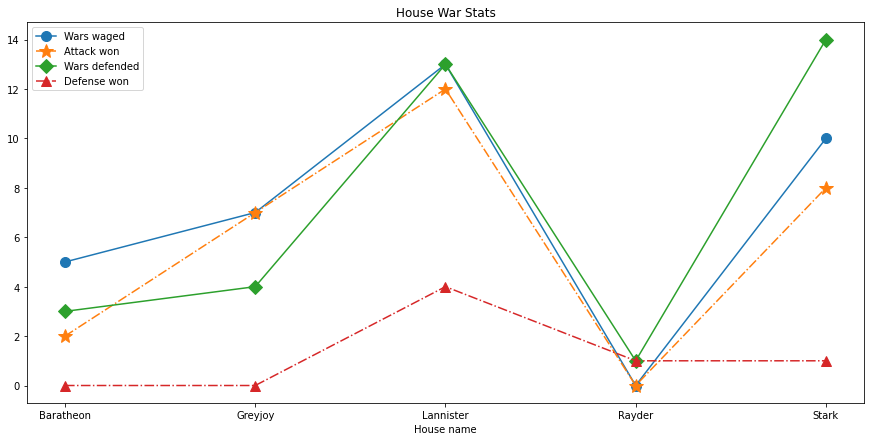

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df['Wars Waged'],label='Wars waged',marker='o',markersize='10')
plt.plot(df['Attack Win count'],label='Attack won',marker='*',linestyle='-.',markersize='15')
plt.plot(df['Wars Defended'],label='Wars defended',marker='D',markersize='10')
plt.plot(df['Defense Win count'],label='Defense won',marker='^',linestyle='-.',markersize='10')
plt.xlabel('House name')
plt.title('House War Stats')
plt.legend()

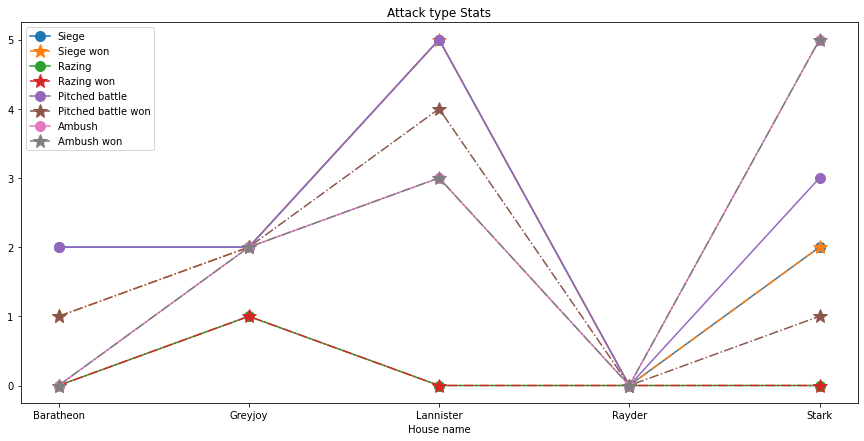

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df['Attacker siege'],label='Siege',marker='o',markersize='10',)
plt.plot(df['Attacker siege win'],label='Siege won',marker='*',linestyle='-.',markersize='15')
plt.plot(df['Attacker razing'],label='Razing',marker='o',markersize='10')
plt.plot(df['Attacker razing win'],label='Razing won',marker='*',linestyle='-.',markersize='15')
plt.plot(df['Attacker Pitched Battle'],label='Pitched battle',marker='o',markersize='10')
plt.plot(df['Attacker Pitched battle win'],label='Pitched battle won',marker='*',linestyle='-.',markersize='15')
plt.plot(df['Attacker Ambush'],label='Ambush',marker='o',markersize='10')
plt.plot(df['Attacker ambush win'],label='Ambush won',marker='*',linestyle='-.',markersize='15')
plt.xlabel('House name')
plt.title('Attack type Stats')
plt.legend()

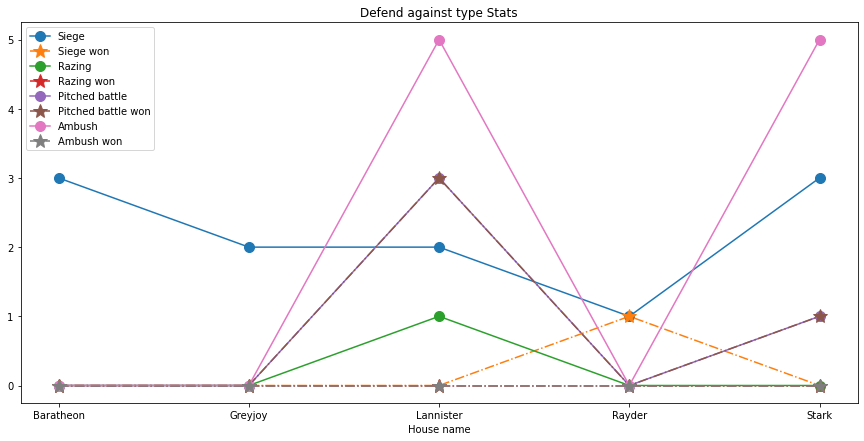

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df['Defender seige'],label='Siege',marker='o',markersize='10',)
plt.plot(df['Defender seige win'],label='Siege won',marker='*',linestyle='-.',markersize='15')
plt.plot(df['Defender razing'],label='Razing',marker='o',markersize='10')
plt.plot(df['Defender razing win'],label='Razing won',marker='*',linestyle='-.',markersize='15')
plt.plot(df['Defender Pitched Battle'],label='Pitched battle',marker='o',markersize='10')
plt.plot(df['Defender Pitched battle win'],label='Pitched battle won',marker='*',linestyle='-.',markersize='15')
plt.plot(df['Defender Ambush'],label='Ambush',marker='o',markersize='10')
plt.plot(df['Defender ambush win'],label='Ambush won',marker='*',linestyle='-.',markersize='15')
plt.xlabel('House name')
plt.title('Defend against type Stats')
plt.legend()

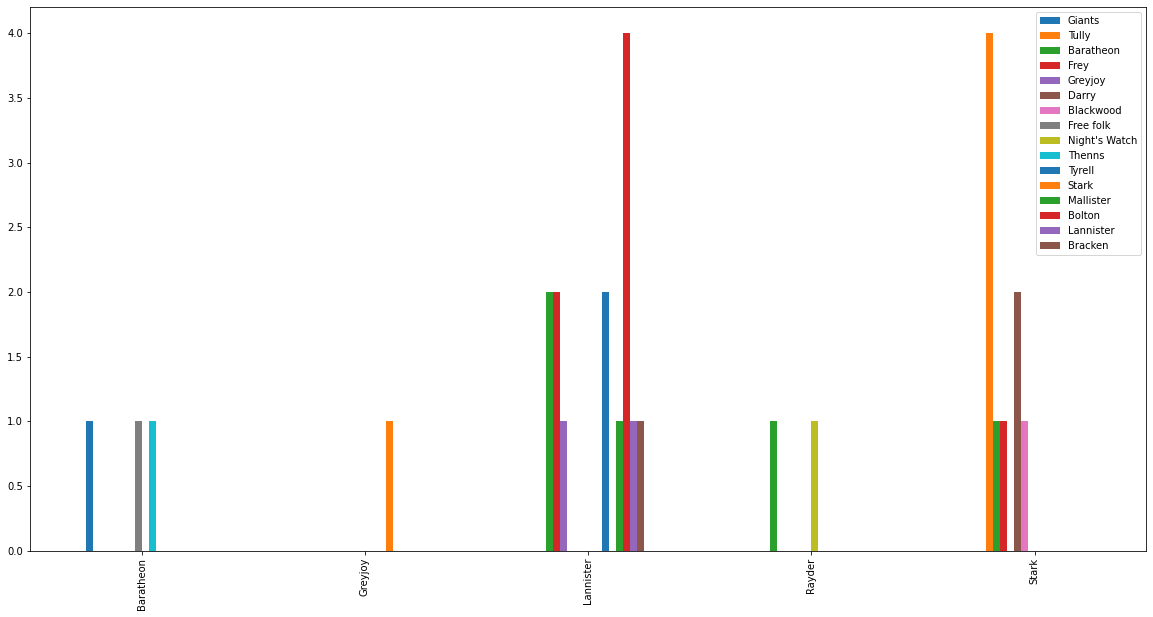

In [ ]:
df[all_houses].plot(kind='bar',figsize=(20,10))

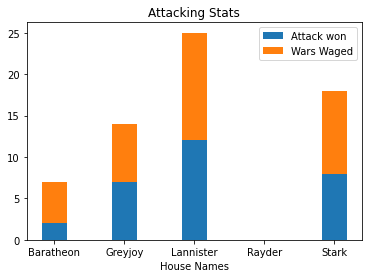

In [ ]:
width=0.35

plt.legend((p1[0], p2[0]), ('Attack won', 'Wars Waged'))

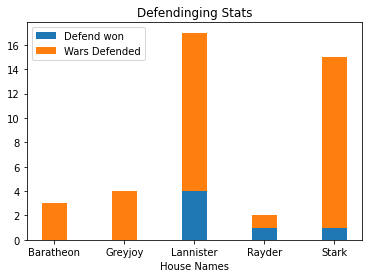

In [ ]:
width=0.35
s1=plt.bar(df.index, df['Defense Win count'], width)
s2=plt.bar(df.index, df['Wars Defended'], width,bottom=df['Defense Win count'])
plt.xlabel('House Names')
plt.title('Defendinging Stats')
plt.legend((s1[0], s2[0]), ('Defend won', 'Wars Defended'))

In [ ]:
hd={'Wildling':1,'None': 2,'Night\'s Watch':3,'Lannister':4,'House Lannister':4,'Stark':5,'House Stark':5,
			'Tully':6,'House Tully':6, 'Arryn':7,'House Arryn':7,'Tyrell':8, 'House Tyrell':8, 'Targaryen':9,
			'House Targaryen':9,'Martell':10,'House Martell':10,'Baratheon':11,'House Baratheon':11,'Greyjoy':12,'House Greyjoy':12}

# Battle victory prediction

In [ ]:
battle.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note,Attacker_House,Defender_House,Attack Victory,Defense Victory,pitched battle,ambush,siege,razing,NaN
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Lannister,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN,Lannister,Stark,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Lannister,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN,Lannister,Stark,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Battle of Riverrun,298,3,Joffrey/Tommen Lannister,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN,Lannister,Stark,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Lannister,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN,Stark,Lannister,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Lannister,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN,Stark,Lannister,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
battle_train=pd.read_csv('https://raw.githubusercontent.com/ArachnidAgrajag/got-analysis-18xd43/main/battles.csv')

In [ ]:
battle_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

In [ ]:
battle_train.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [ ]:
battle_train.shape

(38, 25)

In [ ]:
battle_train.isnull().sum()

name                   0
year                   0
battle_number          0
attacker_king          2
defender_king          3
attacker_1             0
attacker_2            28
attacker_3            35
attacker_4            36
defender_1             1
defender_2            36
defender_3            38
defender_4            38
attacker_outcome       1
battle_type            1
major_death            1
major_capture          1
attacker_size         14
defender_size         19
attacker_commander     1
defender_commander    10
summer                 1
location               1
region                 0
note                  33
dtype: int64

## Handling missing data 

In [ ]:
battle_train['attacker_size'].fillna((battle_train['attacker_size'].mean()),inplace=True)
battle_train['defender_size'].fillna((battle_train['defender_size'].mean()),inplace=True)
battle_train['summer'].fillna(battle_train['summer'].mode(),inplace=True)
battle_train.fillna('None',inplace=True)

In [ ]:
battle_train.head(50)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,None,None,None,Tully,None,None,None,win,pitched battle,1,0,15000.000000,4000.000000,Jaime Lannister,"Clement Piper, Vance",1,Golden Tooth,The Westerlands,None
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,None,None,None,Baratheon,None,None,None,win,ambush,1,0,9942.541667,120.000000,Gregor Clegane,Beric Dondarrion,1,Mummer's Ford,The Riverlands,None
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,None,None,None,Tully,None,None,None,win,pitched battle,0,1,15000.000000,10000.000000,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1,Riverrun,The Riverlands,None
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,None,None,None,Lannister,None,None,None,loss,pitched battle,1,1,18000.000000,20000.000000,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1,Green Fork,The Riverlands,None
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,None,None,Lannister,None,None,None,win,ambush,1,1,1875.000000,6000.000000,"Robb Stark, Brynden Tully",Jaime Lannister,1,Whispering Wood,The Riverlands,None
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,None,None,Lannister,None,None,None,win,ambush,0,0,6000.000000,12625.000000,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1,Riverrun,The Riverlands,None
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,None,None,None,Darry,None,None,None,win,pitched battle,0,0,9942.541667,6428.157895,Gregor Clegane,Lyman Darry,1,Darry,The Riverlands,None
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,None,None,None,Stark,None,None,None,win,pitched battle,0,0,9942.541667,6428.157895,Victarion Greyjoy,None,1,Moat Cailin,The North,None
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,None,None,None,Stark,None,None,None,win,siege,0,0,1000.000000,6428.157895,Asha Greyjoy,None,1,Deepwood Motte,The North,None
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,None,None,None,Stark,None,None,None,win,ambush,0,0,264.000000,6428.157895,Theon Greyjoy,None,1,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...


In [ ]:
battle_train.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [ ]:
for i in battle_train.index:
  if battle_train.loc[i,'attacker_outcome']=='win':
    battle_train.loc[i,'Attack Victory']=1
  else:
    battle_train.loc[i,'Attack Victory']=0

## Visuals

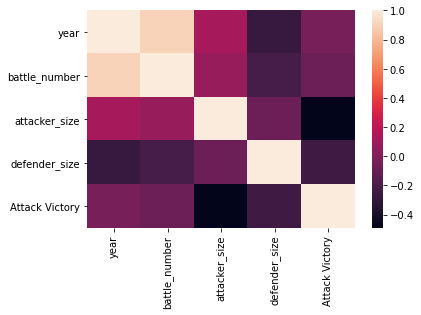

In [ ]:
corr=battle_train.corr()
sns.heatmap(corr)

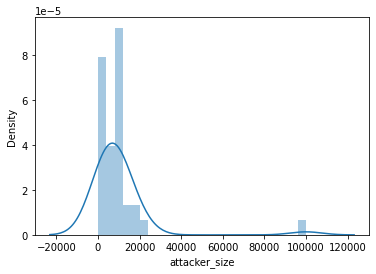

In [ ]:
sns.distplot(battle_train['attacker_size'])

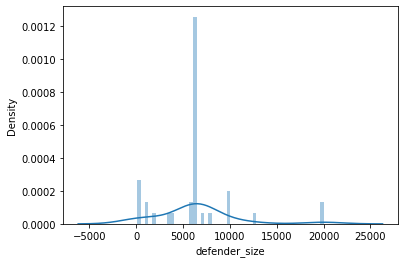

In [ ]:
sns.distplot(battle_train['defender_size'])

## Fitting and testing the model

In [ ]:
drop1=['defender_2','defender_3','defender_4','note','attacker_3','attacker_4','attacker_outcome']
battle_train.drop(drop1,axis=1,inplace=True)

In [ ]:
battle_train.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'defender_1', 'battle_type', 'major_death',
       'major_capture', 'attacker_size', 'defender_size', 'attacker_commander',
       'defender_commander', 'summer', 'location', 'region', 'Attack Victory'],
      dtype='object')

In [ ]:
battle_train.drop(25,inplace=True)

In [ ]:
battle_train=pd.get_dummies(battle_train)

In [ ]:
y2=battle_train['Attack Victory']
X2=battle_train.drop('Attack Victory',axis=1)

In [ ]:
X2.head()

,year,battle_number,attacker_size,defender_size,name_Battle at the Mummer's Ford,name_Battle of Castle Black,name_Battle of Deepwood Motte,name_Battle of Duskendale,name_Battle of Moat Cailin,name_Battle of Oxcross,name_Battle of Riverrun,name_Battle of Torrhen's Square,name_Battle of Winterfell,name_Battle of the Blackwater,name_Battle of the Burning Septry,name_Battle of the Camps,name_Battle of the Crag,name_Battle of the Fords,name_Battle of the Golden Tooth,name_Battle of the Green Fork,name_Battle of the Ruby Ford,name_Battle of the Shield Islands,name_Battle of the Stony Shore,name_Battle of the Whispering Wood,name_Fall of Moat Cailin,"name_Invasion of Ryamsport, Vinetown, and Starfish Harbor",name_Retaking of Deepwood Motte,name_Retaking of Harrenhal,name_Sack of Darry,name_Sack of Harrenhal,name_Sack of Saltpans,name_Sack of Torrhen's Square,name_Sack of Winterfell,name_Second Seige of Storm's End,name_Siege of Darry,name_Siege of Dragonstone,name_Siege of Raventree,name_Siege of Riverrun,name_Siege of Seagard,name_Siege of Storm's End,...,defender_commander_Tytos Blackwood,"defender_commander_Tywin Lannister, Gregor Clegane, Kevan Lannister, Addam Marbrand",defender_commander_Vargo Hoat,summer_0.0,summer_1.0,summer_None,location_Castle Black,location_Crag,location_Darry,location_Deepwood Motte,location_Dragonstone,location_Duskendale,location_Golden Tooth,location_Green Fork,location_Harrenhal,location_King's Landing,location_Moat Cailin,location_Mummer's Ford,location_None,location_Oxcross,location_Raventree,location_Red Fork,location_Riverrun,location_Ruby Ford,"location_Ryamsport, Vinetown, Starfish Harbor",location_Saltpans,location_Seagard,location_Shield Islands,location_Stony Shore,location_Storm's End,location_Torrhen's Square,location_Whispering Wood,location_Winterfell,region_Beyond the Wall,region_The Crownlands,region_The North,region_The Reach,region_The Riverlands,region_The Stormlands,region_The Westerlands
0,298,1,15000.000000,4000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,298,2,9942.541667,120.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,298,3,15000.000000,10000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,298,4,18000.000000,20000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,298,5,1875.000000,6000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
lr=LogisticRegression()
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.33,random_state=42)
lr.fit(X2_train,y2_train)
lr.score(X2_test,y2_test)

0.8461538461538461

In [ ]:
y2_pred=lr.predict(X2_test)
y2_test=np.array(y2_test)

In [ ]:
confusion_matrix(y2_test,y2_pred)

array([[ 1,  1],
       [ 1, 10]])

## Predicting for user input data

In [ ]:
red_wedding=battle_train.iloc[25]
red_wedding

name                                           The Red Wedding
year                                                       299
battle_number                                               26
attacker_king                         Joffrey/Tommen Baratheon
defender_king                                       Robb Stark
attacker_1                                                Frey
attacker_2                                              Bolton
defender_1                                               Stark
battle_type                                             ambush
major_death                                                  1
major_capture                                                1
attacker_size                                             3500
defender_size                                             3500
attacker_commander    Walder Frey, Roose Bolton, Walder Rivers
defender_commander                                  Robb Stark
summer                                                 

In [ ]:
battle_train=pd.get_dummies(battle_train)

In [ ]:
red_wedding=battle_train.iloc[25]
battle_train.drop(25,inplace=True)

In [ ]:
y2=battle_train['Attack Victory']
X2=battle_train.drop('Attack Victory',axis=1)
lr=LogisticRegression()
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.33,random_state=42)
lr.fit(X2_train,y2_train)
lr.score(X2_test,y2_test)

0.8461538461538461

In [ ]:
red_wedding['Attack Victory']

1.0

In [ ]:
red_wedding=red_wedding.drop('Attack Victory')

In [ ]:
result=lr.predict_proba([red_wedding.T])
result

array([[0.0168506, 0.9831494]])

In [ ]:
if result[0,1]>0.5 :
  print('Battle Won')
else:
  print('Battle Lost')

Battle Won


# CHARACTER DEATH PREDICTION

## Descriptive Stats

In [ ]:
character_predictions.head(10)

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
5,6,1,0,0.021,0.979,Tommen Baratheon,NaN,1,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1,1,1.000000,1
6,7,0,0,0.014,0.986,Valarr Targaryen,Hand of the King,1,Valyrian,183.0,209.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0,1,0.431438,0
7,8,0,0,0.036,0.964,Viserys I Targaryen,NaN,1,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1,1,0.678930,0
8,9,0,1,0.724,0.276,Wilbert,Ser,1,NaN,NaN,298.0,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.006689,0
9,10,1,0,0.391,0.609,Wilbert Osgrey,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.020067,1


In [ ]:
character_predictions.shape

(1946, 33)

In [ ]:
character_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

In [ ]:
character_predictions.describe()

,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,21.000000,26.000000,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.745632,0.687050,0.634470,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,0.480473,0.591984,0.395170,0.714286,0.192308,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.435617,0.463813,0.312637,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,0.499747,0.491593,0.489013,0.462910,0.401918,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,0.000000,0.391250,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,1.000000,0.735500,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,1.000000,0.899000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
character_predictions.drop(['actual','pred','alive','plod'],axis=1,inplace=True)

In [ ]:
character_predictions.isnull().sum()

S.No                    0
name                    0
title                1008
male                    0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

In [ ]:
character_predictions.nunique()

S.No                 1946
name                 1946
title                 262
male                    2
culture                64
dateOfBirth           134
DateoFdeath            69
mother                 17
father                 20
heir                   22
house                 347
spouse                254
book1                   2
book2                   2
book3                   2
book4                   2
book5                   2
isAliveMother           2
isAliveFather           2
isAliveHeir             2
isAliveSpouse           2
isMarried               2
isNoble                 2
age                    85
numDeadRelations       14
boolDeadRelations       2
isPopular               2
popularity            166
isAlive                 2
dtype: int64

## EDA

In [ ]:
character_predictions['title'].fillna('No Title',inplace=True)

### Handling House Null values



In [ ]:
character_predictions['house'].fillna('',inplace=True)
for i in character_predictions.index:
  if character_predictions.loc[i,'house'].split(' ')[0]=='House':
    character_predictions.loc[i,'house']=character_predictions.loc[i,'house'].split(' ')[-1]

In [ ]:
character_predictions[['name','house']].head(50)

,name,house
0,Viserys II Targaryen,
1,Walder Frey,Frey
2,Addison Hill,Swyft
3,Aemma Arryn,Arryn
4,Sylva Santagar,Santagar
5,Tommen Baratheon,
6,Valarr Targaryen,Targaryen
7,Viserys I Targaryen,
8,Wilbert,
9,Wilbert Osgrey,Osgrey


In [ ]:
house_names_list=list(character_predictions['house'].unique())
print(house_names_list)

['', 'Frey', 'Swyft', 'Arryn', 'Santagar', 'Targaryen', 'Osgrey', "Night's Watch", 'Humble', 'Wylde', 'Wode', 'Fell', 'Brotherhood Without Banners', 'Webber', 'Greyjoy', 'Stark', 'Waynwood', 'Dayne', 'Manderly', 'Light', 'Happy Port', 'Loraq', 'Kingswood Brotherhood', 'Botley', 'Burned Men', 'Velaryon', 'Tallhart', 'Tyrell', 'Blackwood', 'Blackfyre', 'wildling', 'Kingdom of the Three Daughters', 'Moon', 'Nayland', 'Rest', 'Rowan', 'Farrow', 'Lonmouth', 'Reyne', 'Ashford', 'Brax', 'Paege', 'Hollard', 'Tarth', 'Ryswell', 'Lannister', 'Crakehall', 'Darklyn', 'Westerling', 'Weaver', 'Connington', 'Stout', 'Harclay', 'Drumm', 'Lannisport', 'Crabb', 'Drowned men', 'Stormcrows', 'Antler Men', 'Spicer', 'Staunton', 'Stonetree', 'Leygood', 'Bolton', 'Sparr', 'Hall', 'Varner', 'Tarly', 'Peach', 'Lynderly', 'Ironmaker', 'Martell', 'Clegane', 'Costayne', 'Heddle', 'Stone Crows', 'Ryger', 'Sea watch', 'Second Sons', 'Moon Brothers', 'Baelish', 'Faceless Men', 'Brave Companions', 'Riverrun', 'Stokew

In [ ]:
for i in character_predictions.index:
  if character_predictions.loc[i,'name'].split(' ')[-1] in house_names_list and character_predictions.loc[i,'house']=='':
    character_predictions.loc[i,'house']=character_predictions.loc[i,'name'].split(' ')[-1]
  elif character_predictions.loc[i,'house']=='':
    character_predictions.loc[i,'house']='No house'

In [ ]:
character_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   name               1946 non-null   object 
 2   title              1946 non-null   object 
 3   male               1946 non-null   int64  
 4   culture            677 non-null    object 
 5   dateOfBirth        433 non-null    float64
 6   DateoFdeath        444 non-null    float64
 7   mother             21 non-null     object 
 8   father             26 non-null     object 
 9   heir               23 non-null     object 
 10  house              1946 non-null   object 
 11  spouse             276 non-null    object 
 12  book1              1946 non-null   int64  
 13  book2              1946 non-null   int64  
 14  book3              1946 non-null   int64  
 15  book4              1946 non-null   int64  
 16  book5              1946 

### Handling Culture Null Values

In [ ]:
character_predictions['culture'].fillna('None',inplace=True)

In [ ]:
character_predictions['culture'].unique()

array(['None', 'Rivermen', 'Dornish', 'Valyrian', 'Ironborn', 'Free Folk',
       'Northmen', 'Summer Isles', 'Braavosi', 'Dothraki', 'Ghiscari',
       'Vale mountain clans', 'Reach', 'Tyroshi', 'Lhazarene',
       'Free folk', 'Ironmen', 'Qartheen', 'Lysene', 'westermen',
       'Westerman', 'Qarth', 'Lyseni', 'northmen', 'Qohor', 'Westeros',
       'Norvoshi', 'First Men', 'Meereenese', 'Andal', 'Astapori',
       'Westermen', 'ironborn', 'Ghiscaricari', 'Braavos', 'Stormlands',
       'Valemen', 'Myrish', 'Lhazareen', 'Dornishmen', 'Sistermen',
       'Northern mountain clans', 'Andals', 'Vale', 'Crannogmen',
       'Wildling', 'Dorne', 'Pentoshi', 'free folk', 'Summer Islander',
       'Westerlands', 'Summer Islands', 'Asshai', 'Riverlands', 'Naathi',
       'Rhoynar', 'Meereen', 'Norvos', 'Stormlander', 'Wildlings',
       'Astapor', 'Reachmen', "Asshai'i", 'Ibbenese', 'The Reach'],
      dtype=object)

In [ ]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn': ['ironborn', 'ironmen'],
    'Mereen': ['meereen', 'meereenese'],
    'RiverLands': ['riverlands', 'rivermen'],
    'Vale': ['vale', 'valemen', 'vale mountain clans'],
    'Astapori':['astapor','astapori']
}

def get_cult(value):
  value=value.lower()
  v=[k for (k,v) in cult.items() if value in v]
  return v[0] if len(v)>0 else value.title()
  
character_predictions.loc[:,'culture']=[get_cult(x) for x in character_predictions['culture']]

In [ ]:
character_predictions['culture'].unique()

array(['None', 'RiverLands', 'Dornish', 'Valyrian', 'Ironborn',
       'Free Folk', 'Northmen', 'Summer Islands', 'Braavosi', 'Dothraki',
       'Ghiscari', 'Vale', 'Reach', 'Tyroshi', 'Lhazarene', 'Qartheen',
       'Lysene', 'Westermen', 'Qohor', 'Westerosi', 'Norvoshi', 'Mereen',
       'Andal', 'Astapori', 'Stormlander', 'Myrish', 'Lhazareen',
       'Sistermen', 'Northern Mountain Clans', 'Crannogmen', 'Pentoshi',
       'Asshai', 'Naathi', 'Rhoynar', 'Wildlings', 'Ibbenese'],
      dtype=object)

In [ ]:
df=character_predictions[character_predictions['culture']!='None']
house_culture_group=df.groupby('house')['culture'].agg(lambda x: pd.Series.mode(x)[0])
house_culture_group=dict(house_culture_group)
house_culture_group

{'Allyrion': 'Dornish',
 'Arryn': 'Vale',
 'Ashford': 'Reach',
 'Baelish': 'Vale',
 'Band of Nine': 'Tyroshi',
 'Baratheon': 'Stormlander',
 'Barrel': 'Reach',
 'Black Ears': 'Vale',
 'Blackfyre': 'Valyrian',
 'Blackmont': 'Dornish',
 'Blacktyde': 'Ironborn',
 'Bolton': 'Northmen',
 'Borrell': 'Sistermen',
 'Botley': 'Ironborn',
 'Brave Companions': 'Dothraki',
 'Brotherhood without banners': 'Tyroshi',
 'Burned Men': 'Vale',
 'Cassel': 'Northmen',
 'Cerwyn': 'Northmen',
 "Chataya's brothel": 'Summer Islands',
 'Codd': 'Ironborn',
 'Cole': 'Stormlander',
 'Connington': 'Stormlander',
 'Dalt': 'Dornish',
 'Darklyn': 'Myrish',
 'Darry': 'Westerosi',
 'Dayne': 'Dornish',
 'Dragonstone': 'Lysene',
 'Dreadfort': 'Northmen',
 'Drinkwater': 'Dornish',
 'Drowned men': 'Ironborn',
 'Drumm': 'Ironborn',
 'Dustin': 'Northmen',
 'Egen': 'Vale',
 'Estermont': 'Stormlander',
 'Farman': 'Westermen',
 'Farwynd': 'Ironborn',
 'Flint': 'Northmen',
 'Fowler': 'Dornish',
 'Frey': 'RiverLands',
 'Galare': 

In [ ]:
for i in character_predictions.index:
  if character_predictions.loc[i,'house']!='No House' and character_predictions.loc[i,'house'] in house_culture_group.keys():
    character_predictions.loc[i,'culture']=house_culture_group[character_predictions.loc[i,'house']]

### Handling the null values of numerical data and some inconsistent data

In [ ]:
character_predictions[character_predictions['age']<0]

,S.No,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
1684,1685,Doreah,No Title,0,Valyrian,278279.0,299.0,NaN,NaN,NaN,Targaryen,NaN,1,1,0,0,1,NaN,NaN,NaN,NaN,0,0,-277980.0,0,0,0,0.110368,0
1868,1869,Rhaego,No Title,0,Valyrian,298299.0,298.0,NaN,NaN,NaN,Targaryen,NaN,1,1,1,1,0,NaN,NaN,NaN,NaN,0,0,-298001.0,6,1,0,0.167224,0


In [ ]:
character_predictions.loc[1684,'age']=25
character_predictions.loc[1868,'age']=0

In [ ]:
character_predictions['age'].fillna(character_predictions['age'].mean(),inplace=True)

In [ ]:
character_predictions[character_predictions['dateOfBirth']<0]

,S.No,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
87,88,Rhaenys Targaryen,Queen,0,Valyrian,-25.0,10.0,NaN,NaN,NaN,Targaryen,Aegon I Targaryen,1,0,0,0,0,NaN,NaN,NaN,0.0,1,1,35.0,1,1,0,0.277592,0
1827,1828,Visenya Targaryen,QueenDowager Queen,0,Valyrian,-28.0,44.0,NaN,NaN,NaN,Targaryen,Aegon I Targaryen,1,1,1,1,1,NaN,NaN,NaN,0.0,1,1,72.0,5,1,0,0.277592,0


In [ ]:
character_predictions.loc[87,'dateOfBirth']=259

In [ ]:
character_predictions[character_predictions['dateOfBirth']>300]

,S.No,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
1684,1685,Doreah,No Title,0,Valyrian,278279.0,299.0,NaN,NaN,NaN,Targaryen,NaN,1,1,0,0,1,NaN,NaN,NaN,NaN,0,0,25.0,0,0,0,0.110368,0
1868,1869,Rhaego,No Title,0,Valyrian,298299.0,298.0,NaN,NaN,NaN,Targaryen,NaN,1,1,1,1,0,NaN,NaN,NaN,NaN,0,0,0.0,6,1,0,0.167224,0


In [ ]:
character_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   name               1946 non-null   object 
 2   title              1946 non-null   object 
 3   male               1946 non-null   int64  
 4   culture            1946 non-null   object 
 5   dateOfBirth        433 non-null    float64
 6   DateoFdeath        444 non-null    float64
 7   mother             21 non-null     object 
 8   father             26 non-null     object 
 9   heir               23 non-null     object 
 10  house              1946 non-null   object 
 11  spouse             276 non-null    object 
 12  book1              1946 non-null   int64  
 13  book2              1946 non-null   int64  
 14  book3              1946 non-null   int64  
 15  book4              1946 non-null   int64  
 16  book5              1946 

In [ ]:
character_predictions.loc[1684,'dateOfBirth']=character_predictions.loc[1868,'DateoFdeath']-25
character_predictions.loc[1868,'dateOfBirth']=character_predictions.loc[1868,'DateoFdeath']=233

In [ ]:
character_predictions.isnull().sum()

S.No                    0
name                    0
title                   0
male                    0
culture                 0
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                   0
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                     0
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

In [ ]:
character_predictions['dateOfBirth'].fillna(np.round(character_predictions['dateOfBirth'].mean()),inplace=True)

In [ ]:
character_predictions.head(5)

,S.No,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,Viserys II Targaryen,No Title,1,Valyrian,248.0,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,Targaryen,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,36.704388,11,1,1,0.605351,0
1,2,Walder Frey,Lord of the Crossing,1,RiverLands,208.0,NaN,NaN,NaN,NaN,Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.000000,1,1,1,0.896321,1
2,3,Addison Hill,Ser,1,None,248.0,NaN,NaN,NaN,NaN,Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,36.704388,0,0,0,0.267559,1
3,4,Aemma Arryn,Queen,0,Vale,82.0,105.0,NaN,NaN,NaN,Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.000000,0,0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.000000,0,0,0,0.043478,1


In [ ]:
character_predictions['isAliveSpouse'].fillna(2,inplace=True)

In [ ]:
character_predictions['isAliveMother'].fillna(2,inplace=True)
character_predictions['isAliveFather'].fillna(2,inplace=True)
character_predictions['isAliveHeir'].fillna(2,inplace=True)

### Importing Modules

### Drop the unnecessary columns

In [ ]:
drop_columns=['S.No','name','DateoFdeath','mother','father','heir','spouse']
data=character_predictions.drop(drop_columns,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1946 non-null   object 
 1   male               1946 non-null   int64  
 2   culture            1946 non-null   object 
 3   dateOfBirth        1946 non-null   float64
 4   house              1946 non-null   object 
 5   book1              1946 non-null   int64  
 6   book2              1946 non-null   int64  
 7   book3              1946 non-null   int64  
 8   book4              1946 non-null   int64  
 9   book5              1946 non-null   int64  
 10  isAliveMother      1946 non-null   float64
 11  isAliveFather      1946 non-null   float64
 12  isAliveHeir        1946 non-null   float64
 13  isAliveSpouse      1946 non-null   float64
 14  isMarried          1946 non-null   int64  
 15  isNoble            1946 non-null   int64  
 16  age                1946 

### Encoding the Object type data using Label Encoding

In [ ]:
LE=LabelEncoder()
data['culture']=LE.fit_transform(data['culture'])
data['title']=LE.fit_transform(data['title'])
data['house']=LE.fit_transform(data['house'])

In [ ]:
data.head(10)

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,178,1,24,248.0,290,0,0,0,0,0,1.0,0.0,0.0,2.0,0,0,36.704388,11,1,1,0.605351,0
1,151,1,18,208.0,108,1,1,1,1,1,2.0,2.0,2.0,1.0,1,1,97.000000,1,1,1,0.896321,1
2,218,1,13,248.0,288,0,0,0,1,0,2.0,2.0,2.0,2.0,0,1,36.704388,0,0,0,0.267559,1
3,195,0,23,82.0,4,0,0,0,0,0,2.0,2.0,2.0,0.0,1,1,23.000000,0,0,0,0.183946,0
4,68,0,5,276.0,256,0,0,0,1,0,2.0,2.0,2.0,1.0,1,1,29.000000,0,0,0,0.043478,1
5,178,1,20,248.0,11,0,0,0,0,0,1.0,1.0,1.0,2.0,0,0,36.704388,5,1,1,1.000000,1
6,72,1,24,183.0,290,0,0,0,0,0,2.0,2.0,2.0,1.0,1,1,26.000000,0,0,1,0.431438,0
7,178,1,24,248.0,290,0,0,0,0,0,1.0,1.0,1.0,2.0,0,0,36.704388,5,1,1,0.678930,0
8,218,1,7,248.0,213,0,0,1,0,0,2.0,2.0,2.0,2.0,0,1,36.704388,0,0,0,0.006689,0
9,218,1,13,248.0,218,0,0,0,0,0,2.0,2.0,2.0,2.0,0,1,36.704388,0,0,0,0.020067,1


### Graphs and Plots

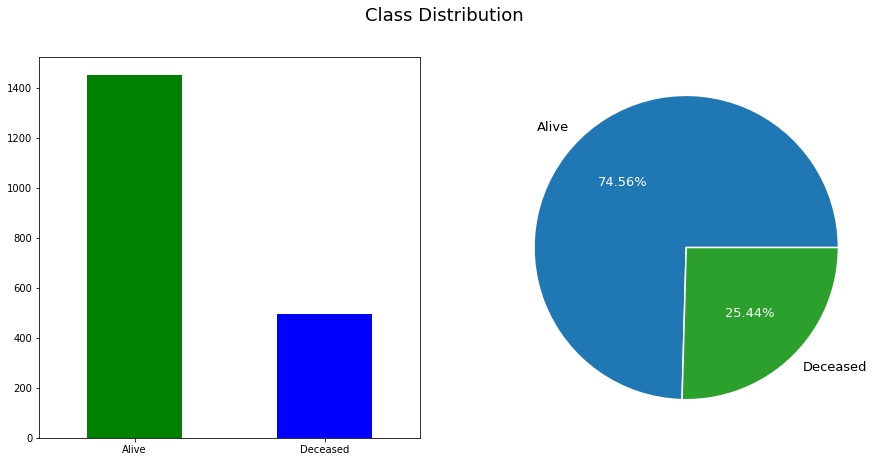

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Class Distribution", fontsize = 18.)
_ = data['isAlive'].value_counts().plot.bar(ax = ax[0], rot = 0,color={'green','blue'}).set(xticklabels = ["Alive", "Deceased"])
_ = data['isAlive'].value_counts().plot.pie(labels = ("Alive", "Deceased"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "white"}), ax[1].texts[1].set_color("white"), ax[1].texts[3].set_color("white")

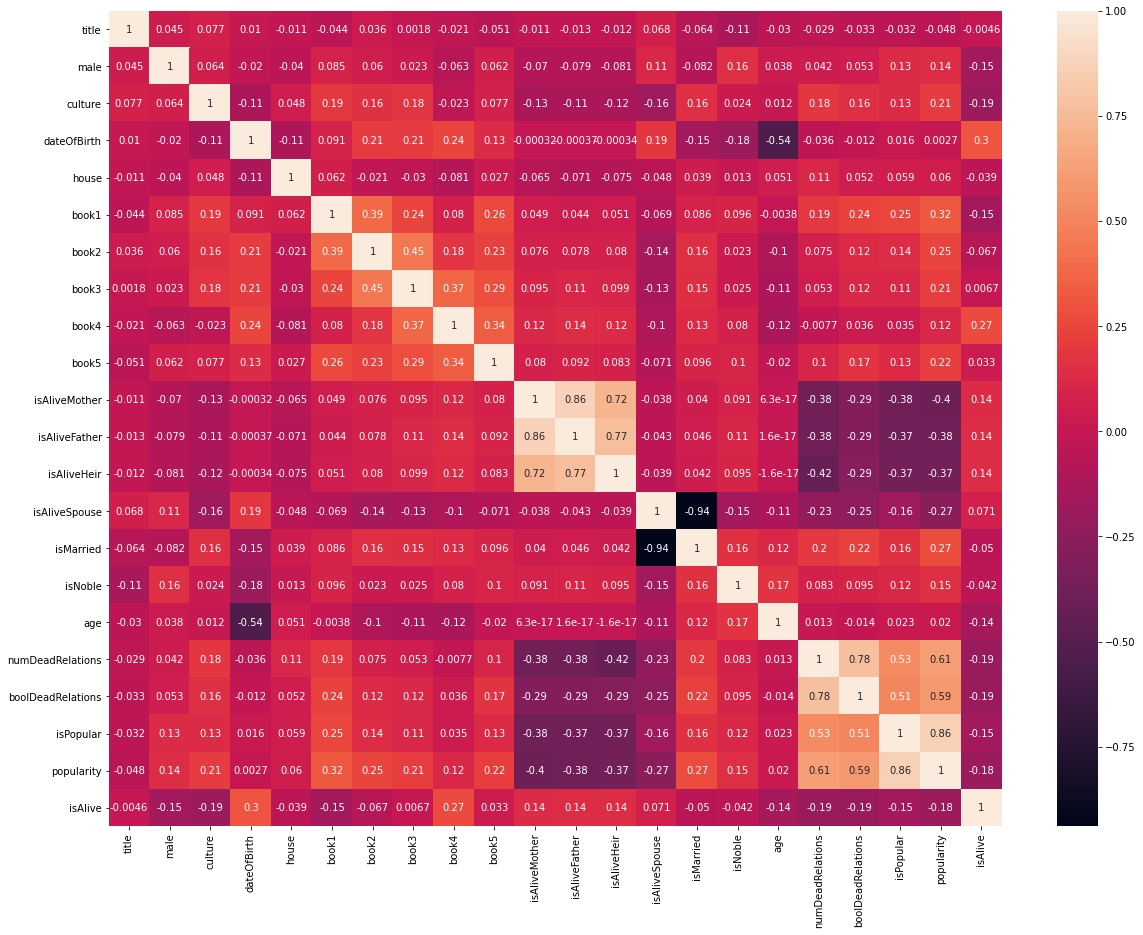

In [ ]:
plt.figure(figsize=(20,15))
corr=data.corr()
sns.heatmap(corr,annot=True)

In [ ]:
data.isnull().sum()

title                0
male                 0
culture              0
dateOfBirth          0
house                0
book1                0
book2                0
book3                0
book4                0
book5                0
isAliveMother        0
isAliveFather        0
isAliveHeir          0
isAliveSpouse        0
isMarried            0
isNoble              0
age                  0
numDeadRelations     0
boolDeadRelations    0
isPopular            0
popularity           0
isAlive              0
dtype: int64

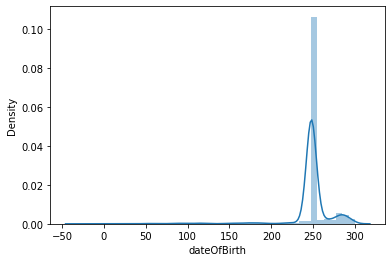

In [ ]:
sns.distplot(data['dateOfBirth'])

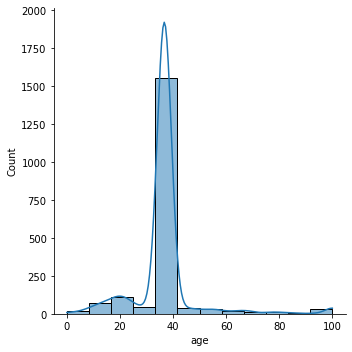

In [ ]:
sns.displot(data['age'],kde=True)

Text(0.5, 1.0, 'Culture and Character Death relation')

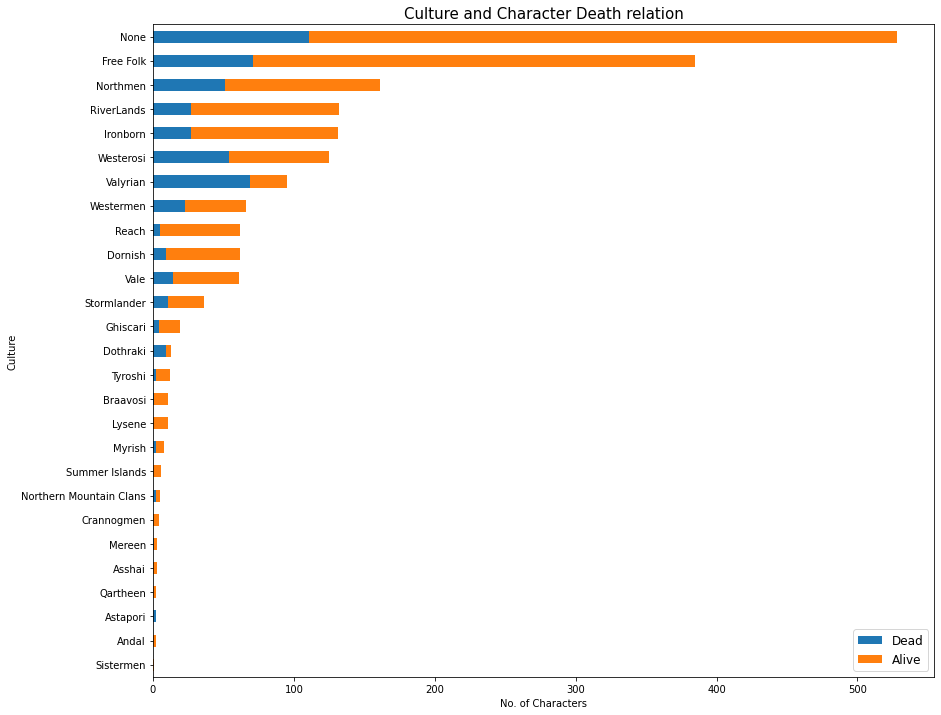

In [ ]:
data_x= character_predictions.groupby(["culture", "isAlive"]).count()["S.No"].unstack()
data_x.loc[:, "total"]= data_x.sum(axis = 1)
p = data_x[data_x.index != ""].sort_values("total")[[0, 1]].plot.barh(stacked = True, rot = 0, figsize = (14, 12),)
p_= p.set(xlabel = "No. of Characters", ylabel = "Culture"), p.legend(["Dead", "Alive"], loc = "lower right",fontsize=12)
plt.title('Culture and Character Death relation',fontdict={'fontsize': '15'})
 

### Splitting the data to train and test Data

In [ ]:
X=data.drop('isAlive',axis=1)
y=data['isAlive']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

# Logistic Regression Model

In [ ]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.795970 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.777978 (0.055331) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.773360 (0.042875) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.779006 (0.049675) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.778492 (0.053057) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.774387 (0.044361) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.776442 (0.043079) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.775922 (0.052658) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.770792 (0.043301) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.774909 (0.036490) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.783636 (0.038522) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.778502 (0.034866) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.779527 (0.033528) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.795970 (0.023965) wi

In [ ]:
lr=LogisticRegression(C=0.01,penalty='l2',solver='newton-cg')
lr.fit(X_train,y_train)
print(np.mean(cross_val_score(lr,X,y)))

0.7959699426537472


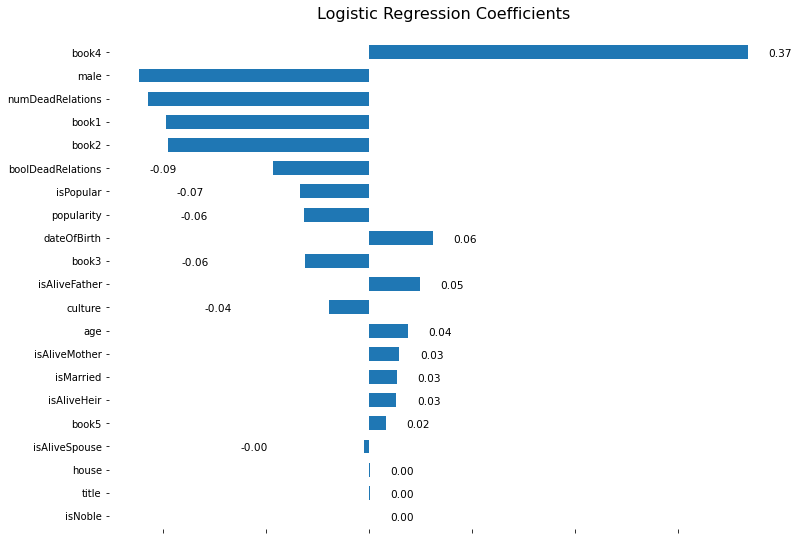

In [ ]:
df = pd.DataFrame(list(zip(X_train.columns, lr.coef_[0])))
df = df.reindex(df[1].abs().sort_values().index).set_index(0)
ax = df.plot.barh(width = .6, legend = "", figsize = (12, 9))
ax.set_title("Logistic Regression Coefficients", y = 1.03, fontsize = 16.)
_ = ax.set(frame_on = False, xlabel = "", xticklabels = "", ylabel = "")

for i, label in enumerate(list(df.index)):
    score = df.loc[label][1]
    ax.annotate('%.2f' % score, (score + (-.12 if score < 0 else .02), i - .2), fontsize = 10.5)

In [ ]:
y_pred=lr.predict(X_test)
y_test=np.array(y_test)

In [ ]:
c=confusion_matrix(y_test,y_pred)
c

array([[ 39, 134],
       [  1, 469]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.23      0.37       173
           1       0.78      1.00      0.87       470

    accuracy                           0.79       643
   macro avg       0.88      0.61      0.62       643
weighted avg       0.83      0.79      0.74       643



## Predicting for user input data

In [ ]:
arya_stark=pd.Series({'title':178,'male':0,'culture':7,'dateOfBirth':289,'house':273,'book1':0,'book2':0,'book3':0,'book4':1,'book5':1,'isAliveMother':0,'isAliveFather':0,'isAliveHeir':0,'isAliveSpouse':0,'isMarried':0,'isNoble':1,'age':18,'numDeadRelations':4,'boolDeadRelations':1,'isPopular':1,'popularity':0.7})

In [ ]:
lr.predict_proba([arya_stark.T])

array([[0.07258609, 0.92741391]])

In [ ]:
if(lr.predict_proba([arya_stark.T])[0,1]>0.5):
  print("Based on the prediction of the model Arya Stark is ALIVE")
else:
  print("Based on the prediction of the model Arya Stark is DEAD")

Based on the prediction of the model Arya Stark is ALIVE


In [ ]:
jon_snow=pd.Series({'title':178,'male':1,'culture':7,'dateOfBirth':289,'house':273,'book1':0,'book2':0,'book3':0,'book4':1,'book5':1,'isAliveMother':1,'isAliveFather':0,'isAliveHeir':0,'isAliveSpouse':0,'isMarried':0,'isNoble':1,'age':18,'numDeadRelations':3,'boolDeadRelations':1,'isPopular':1,'popularity':0.7})

In [ ]:
if(lr.predict_proba([jon_snow.T])[0,1]>0.5):
  print("Based on the prediction of the model John Snow is ALIVE")
else:
  print("Based on the prediction of the model John Snow is DEAD")

Based on the prediction of the model John Snow is ALIVE


In [ ]:
tywin_lannister=pd.Series({'title':72,'male':1,'culture':0,'dateOfBirth':234,'house':145,'book1':0,'book2':0,'book3':0,'book4':1,'book5':1,'isAliveMother':0,'isAliveFather':0,'isAliveHeir':1,'isAliveSpouse':0,'isMarried':1,'isNoble':1,'age':65,'numDeadRelations':5,'boolDeadRelations':1,'isPopular':1,'popularity':0.9})

In [ ]:
if(lr.predict_proba([tywin_lannister.T])[0,1]>0.5):
  print("Based on the prediction of the model Tywin Lannister is ALIVE")
else:
  print("Based on the prediction of the model Tywin Lannister is DEAD")

Based on the prediction of the model Tywin Lannister is ALIVE
